In [1]:
import pandas as pd
import numpy as np
from math import nan, isnan

In [2]:
df = pd.read_csv('OCDO.L.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-13,308.700012,311.899994,306.200012,308.899994,308.899994,1258823.0
1,2017-10-16,310.000000,311.000000,299.799988,301.000000,301.000000,1718475.0
2,2017-10-17,303.200012,303.200012,296.899994,297.000000,297.000000,1012860.0
3,2017-10-18,298.000000,299.200012,293.899994,297.600006,297.600006,827945.0
4,2017-10-19,296.000000,299.000000,295.100006,297.600006,297.600006,868613.0
...,...,...,...,...,...,...,...
1257,2022-10-06,464.000000,471.700012,454.600006,458.600006,458.600006,2417576.0
1258,2022-10-07,453.700012,460.399994,431.480011,432.100006,432.100006,3845397.0
1259,2022-10-10,425.000000,447.799988,423.000000,437.799988,437.799988,2058923.0
1260,2022-10-11,440.000000,442.899994,414.500000,414.500000,414.500000,3227164.0


In [4]:
df = df[['Date', 'Open']]

In [5]:
open = list(df['Open'])

In [ ]:
open = [x for x in open if isnan(x) == False]

In [6]:
import random

In [7]:
def Random(n):
    return [random.randrange(n) for x in range(n)]


In [8]:
Random(5)

[4, 3, 4, 1, 4]

In [9]:
import matplotlib.pyplot as plt
import statistics

In [33]:
def montecarlo(data, times = 50, day = 100):
    projects = []
    color = iter(plt.cm.rainbow(np.linspace(0, 1, times)))
    for i in range(times):
       
        rate = [open[x+1]/open[x] for x in range(len(open)-2)]
        print(np.isnan(rate).any())
        rand = Random(len(rate))
        randrate = [rate[x] for x in rand]
        #print(rate)
        project = [data[-1]]
        for x in range(len(rate) - 1):
            project.append(project[x]*randrate[x+1])
        projects.append(project)
        c = next(color)
        tradingday = range(len(rate))
        plt.plot(tradingday, project, c)
    plt.xlabel('Trading Day')
    plt.ylabel('USD')
    plt.title('Value of Asset')
    plt.show()
    values = [x[day] for x in projects]
    n, bins, patches = plt.hist(values, 20, density=True, facecolor='g', alpha=0.75)
    plt.xlabel("USD")
    plt.ylabel('Probability')
    plt.show()
    
    return values


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


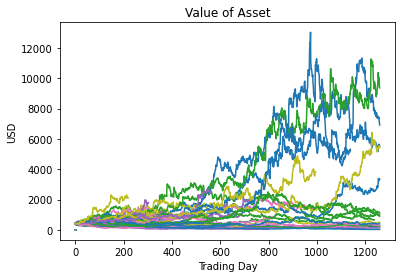

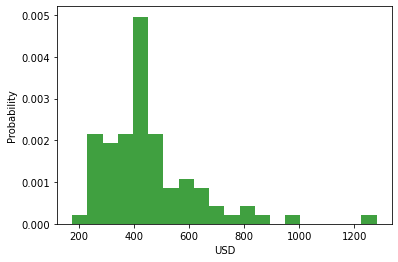

In [34]:
values = montecarlo(open, 100)

In [32]:
print(statistics.mean(values))
print(statistics.stdev(values))
print(np.quantile(values,[0,0.25,0.5,0.75,1]))


nan
nan
[nan nan nan nan nan]


In [27]:
values

[459.02956274014787,
 502.3183029961913,
 532.2027898150618,
 nan,
 386.9870753057858,
 443.53605376312476,
 nan,
 429.1304186547567,
 393.1220591050786,
 373.9119509310606,
 673.9453120737408,
 339.2255497570335,
 337.06911224776894,
 361.52961904780466,
 405.1985776664267,
 291.19252655220214,
 425.9876886660417,
 nan,
 402.6537070049527,
 599.9916593360216,
 409.8070796113962,
 353.9425434499538,
 452.9202860030574,
 nan,
 451.48242410881016,
 273.0032208771165,
 605.2634367429895,
 418.5361960548298,
 718.4377892918479,
 602.1514016149596,
 432.23186655716336,
 315.81042353955564,
 219.5383645445911,
 472.59083766415023,
 265.1291899013804,
 526.0034969713533,
 959.8391436586253,
 491.0835105493806,
 319.8032854359106,
 547.0893116170475,
 181.97322988279382,
 353.83159899776933,
 416.66546757063696,
 334.0968653576249,
 692.734242416859,
 381.01210536416255,
 642.8017364906009,
 259.1820627160165,
 274.0406223635887,
 326.3243685764365,
 627.0823927466521,
 434.0199565611297,
 500